In [1]:
import os
import random
import zipfile
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

IMAGE_SIZE = 224
BATCH_SIZE = 32

tf.__version__

'2.9.2'

In [2]:
with zipfile.ZipFile("drive/MyDrive/DATA/10_food_classes_all_data.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

class_names = os.listdir(test_dir)
n_train_images = 0
n_test_images = 0

for dir in os.listdir(train_dir):
    n_images = len(os.listdir(train_dir + "/" + dir))
    n_train_images += n_images

for dir in os.listdir(test_dir):
    n_images = len(os.listdir(test_dir + "/" + dir))
    n_test_images += n_images

print(f"""There is a {len(class_names)} different classes.
{n_train_images} train images and {n_test_images} test images.""")

There is a 10 different classes.
7500 train images and 2500 test images.


(341, 512, 3)


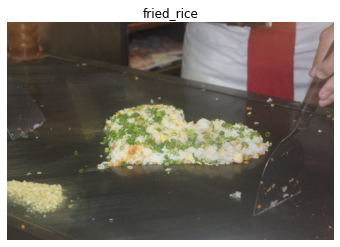

In [4]:
random_class = random.choice(class_names)
images_of_random_class = os.listdir(train_dir + "/" + random_class)
random_image = random.choice(images_of_random_class)
random_image_url = train_dir + "/" + random_class + "/" + random_image

image = mpimg.imread(random_image_url)

print(image.shape)
plt.imshow(image)
plt.title(random_class)
plt.axis(False);

In [5]:
train_data = tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                         label_mode="categorical",
                                                         batch_size=BATCH_SIZE,
                                                         image_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(directory=test_dir,
                                                        label_mode="categorical",
                                                        batch_size=BATCH_SIZE,
                                                        image_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                        shuffle=False,
                                                        seed=42)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [6]:
tf.keras.mixed_precision.global_policy()

<Policy "float32">

In [7]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  mode="max",
                                                  patience=1)

In [8]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=input_shape)

x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(len(class_names), activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

16705208/16705208 [==============================] - 0s 0us/step


In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [10]:
model.fit(train_data, epochs=50,
          steps_per_epoch=len(train_data),
          validation_data=test_data,
          validation_steps=len(test_data),
          callbacks=[early_stopping])

Epoch 1/50
235/235 [==============================] - 40s 111ms/step - loss: 0.8184 - accuracy: 0.7701 - val_loss: 0.3942 - val_accuracy: 0.8996
Epoch 2/50
235/235 [==============================] - 30s 124ms/step - loss: 0.4467 - accuracy: 0.8663 - val_loss: 0.3217 - val_accuracy: 0.9096
Epoch 3/50
235/235 [==============================] - 24s 101ms/step - loss: 0.3730 - accuracy: 0.8891 - val_loss: 0.2938 - val_accuracy: 0.9140
Epoch 4/50
235/235 [==============================] - 26s 109ms/step - loss: 0.3291 - accuracy: 0.9031 - val_loss: 0.2797 - val_accuracy: 0.9148
Epoch 5/50
235/235 [==============================] - 24s 102ms/step - loss: 0.2968 - accuracy: 0.9117 - val_loss: 0.2695 - val_accuracy: 0.9220
Epoch 6/50
235/235 [==============================] - 26s 110ms/step - loss: 0.2701 - accuracy: 0.9203 - val_loss: 0.2651 - val_accuracy: 0.9188
